## <center> *Модель прогнозирования стоимости жилья для агентства недвижимости*

# <center> **Часть II. Разведывательный анализ и моделирование.**

Импорт библиотек

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest

from functions import *

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

## Данные

Читаем данные

In [50]:
data = pd.read_csv('data/data_edited.csv')

data

,status for sale,status coming soon,status new,status foreclosure,status pre-foreclosure,status pending,status auction,status active,status show,status for rent,...,school distance mean,school rating nearest,school distance to best,schools with k,schools with pk,schools with preschool,school grades,target per month,target plus,target
0,0,0,0,0,0,0,0,1,0,0,...,5.537500,7,5.10,3,2,0,13,0,0,418.000
1,1,0,0,0,0,0,0,0,0,0,...,1.326667,4,1.65,1,1,0,13,0,0,310.000
2,1,0,0,0,0,0,0,0,0,0,...,1.960000,8,1.19,1,0,0,13,0,0,2895.000
3,1,0,0,0,0,0,0,0,0,0,...,0.752500,9,1.05,1,1,0,13,0,0,2395.000
4,1,0,0,0,0,0,0,0,0,0,...,4.080000,4,3.25,1,1,0,13,0,0,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360187,1,0,0,0,0,0,0,0,0,0,...,0.250000,3,0.40,1,1,0,13,0,0,799.000
360188,0,0,0,0,0,0,0,0,0,0,...,16.600000,10,32.10,1,1,0,13,0,0,1249.000
360189,1,0,0,0,0,0,0,0,0,0,...,4.143333,1,0.40,1,1,0,13,0,0,674.999
360190,1,0,0,0,0,0,0,0,0,0,...,0.605000,4,0.48,1,1,0,9,0,0,528.000


In [51]:
get_data_info(data)

,Nulls,Uniques,Dtypes
status for sale,0.0,2,int64
status coming soon,0.0,2,int64
status new,0.0,2,int64
status foreclosure,0.0,2,int64
status pre-foreclosure,0.0,2,int64
...,...,...,...
schools with preschool,0.0,11,int64
school grades,0.0,13,int64
target per month,0.0,2,int64
target plus,0.0,2,int64


## Разведывательный анализ

In [52]:
bin_cols = set()

for col in data.columns:
    if data[col].nunique() == 2:
        bin_cols.add(col.split()[0])
    
bin_cols

{'cooling', 'heating', 'parking', 'propertyType', 'status', 'target'}

In [53]:
for col in data.columns:
    print(col)

status for sale
status coming soon
status new
status foreclosure
status pre-foreclosure
status pending
status auction
status active
status show
status for rent
status sold
status under contract
status contingent
status change
status unknown
status other
propertyType single-family
propertyType condo
propertyType land
propertyType townhouse
propertyType multi
propertyType coop
propertyType traditional
propertyType ranch
propertyType mobile
propertyType detached
propertyType contemporary
propertyType modern
propertyType apartment
propertyType story
propertyType stories
propertyType high
propertyType colonial
propertyType other
propertyType unknown
baths
beds
sqft area
property age
property remodeled
heating forced
heating air
heating none
heating electric
heating gas
heating heat pump
heating central
heating baseboard
heating wall
heating system
heating radiant
heating stove
heating zoned
heating refrigeration
heating oil
heating other
cooling forced
cooling air
cooling none
cooling elect

In [54]:
def show_barplot(cols, data=data, figsize=(20, 5)):
    sums = get_sums(data, cols).sort_values(ascending=False)

    col_list = sums.index.tolist()
    vls_list = sums.values.tolist()

    for i in range(len(col_list)):
        col_list[i] = col_list[i].replace(cols+' ', '')

    df = pd.DataFrame({'inx': col_list, 'vls': vls_list})
    
    plt.figure(figsize=figsize)
    sns.barplot(df, x='inx', y='vls')
    
    plt.show()

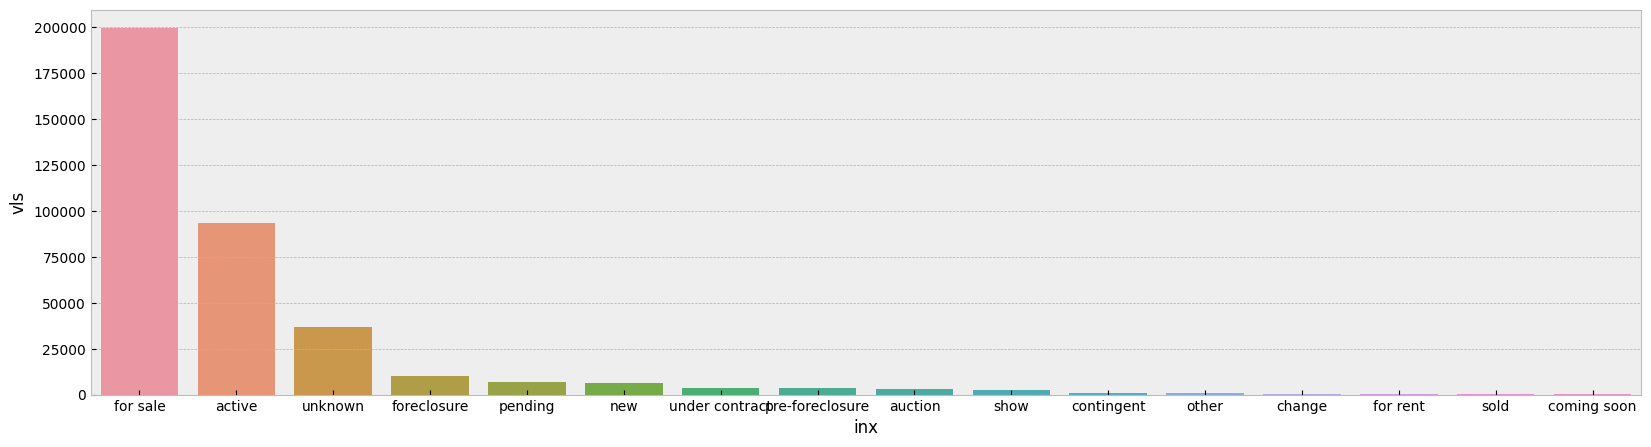

In [55]:
show_barplot('status')

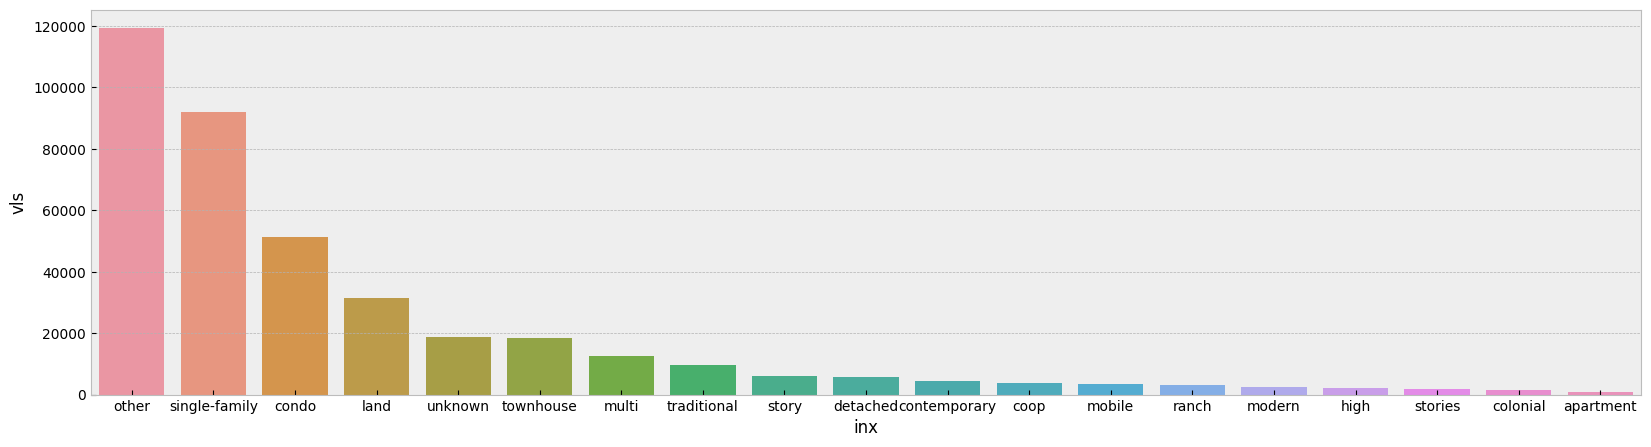

In [56]:
show_barplot('propertyType')

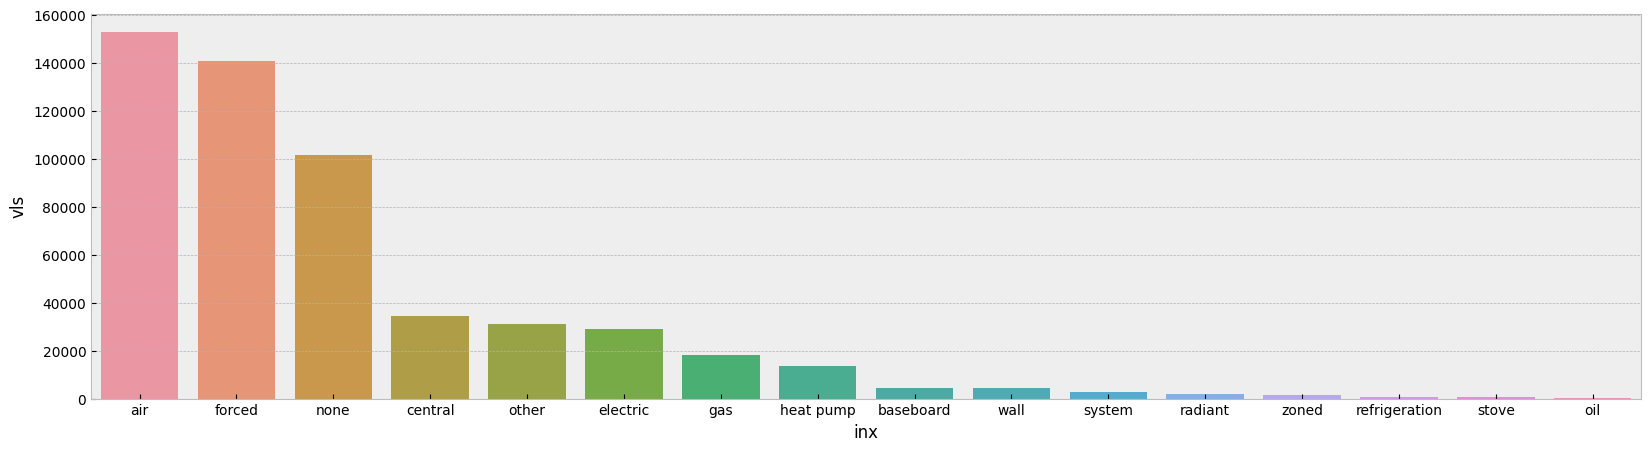

In [57]:
show_barplot('heating')

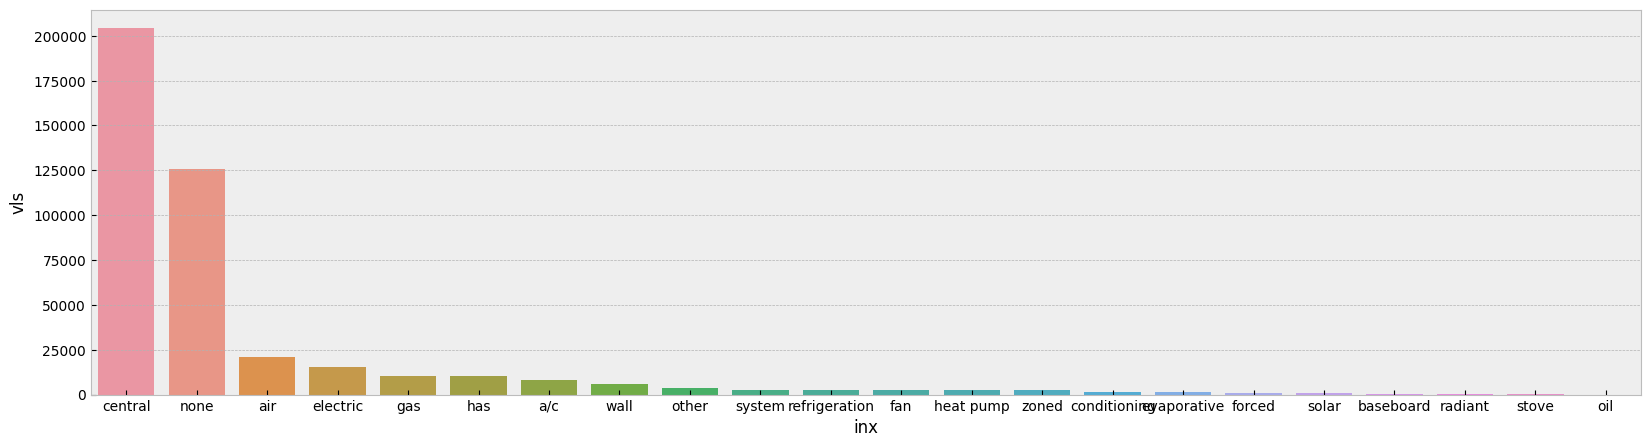

In [58]:
show_barplot('cooling')